Reminder:

You are being evaluated for compeletion and effort in this checkpoint.
Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
We will be working with the same states_edu.csv that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

Choose a specific response variable to focus on
Grade 4 Math, Grade 4 Reading, Grade 8 Math

Pick or create features to use
Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?

Explore the data as it relates to that test
Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data

Create training and testing data
Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?

Train a ML model to predict outcome
Define what you want to predict, and pick a model in sklearn to use (see sklearn regressors.

Summarize your findings
Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

Data Cleanup
Import numpy, pandas, and matplotlib.

(Feel free to import other libraries!)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/tjamesbu/MDST-Tutorial-Redesign/main/data/states_edu.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. (optional)

In [35]:
df = df.dropna()
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


Exploratory Data Analysis (EDA)
Chosen Outcome Variable for Test: AVG_MATH_4_SCORE

How many years of data are logged in our dataset?

In [36]:
num_years = 28
num_years

28

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [37]:
avg_outcome_score_Mich_filter = df[df.STATE == 'MICHIGAN']
#avg_outcome_score_Mich_filter

In [38]:
sum_avg_math_4_score = sum(avg_outcome_score_Mich_filter.AVG_MATH_4_SCORE)
sum_avg_math_4_score

1657.0

In [39]:
avg_outcome_score_Ohio_filter = df[df.STATE == 'OHIO']
#avg_outcome_score_Ohio_filter

In [40]:
sum_avg_math_4_score = sum(avg_outcome_score_Ohio_filter.AVG_MATH_4_SCORE)
sum_avg_math_4_score

1703.0

Ohio has the higher average outcome score across all years

Find the average for your outcome score across all states in 2019

In [41]:
df_filter_2019 = df[df.YEAR == 2019]
sum_avg_math_4_score = sum(df_filter_2019.AVG_MATH_4_SCORE)
sum_avg_math_4_score

0

Data from 2019 was omitted during cleanup of NaNs.  No data was available in this dataset to calculate the average outcome score across all states in 2019.

Find the maximum outcome score for every state.

Refer to the Grouping and Aggregating section in Tutorial 0 if you are stuck.

In [42]:
print(df["STATE"].unique())
print(df["STATE"].nunique())

['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND' 'SOUTH_CAROLINA'
 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING']
51


In [43]:
df.groupby(["STATE"])["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              234.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    231.0
FLORIDA                 243.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             234.0
MISSOURI                241.0
MONTANA                 244.0
NEBRASKA                244.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_MEXICO              233.0
NEW_YORK                243.0
NORT

Feature Engineering


After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [44]:
df_filter1 = pd.DataFrame(data=df, columns = ['STATE', 'INSTRUCTION_EXPENDITURE', 'AVG_MATH_4_SCORE'])
df_filter1

,STATE,INSTRUCTION_EXPENDITURE,AVG_MATH_4_SCORE
561,ALABAMA,2817111.0,223.0
562,ALASKA,763525.0,233.0
563,ARIZONA,2810907.0,229.0
564,ARKANSAS,1768713.0,229.0
565,CALIFORNIA,29561563.0,227.0
...,...,...,...
1219,VIRGINIA,8755896.0,247.0
1220,WASHINGTON,6508964.0,245.0
1221,WEST_VIRGINIA,1819903.0,235.0
1222,WISCONSIN,5723474.0,243.0


In [45]:
df_filter2 = pd.DataFrame(data=df, columns = ['INSTRUCTION_EXPENDITURE', 'AVG_MATH_4_SCORE'])
df_filter2

,INSTRUCTION_EXPENDITURE,AVG_MATH_4_SCORE
561,2817111.0,223.0
562,763525.0,233.0
563,2810907.0,229.0
564,1768713.0,229.0
565,29561563.0,227.0
...,...,...
1219,8755896.0,247.0
1220,6508964.0,245.0
1221,1819903.0,235.0
1222,5723474.0,243.0


In [49]:
from sklearn import preprocessing
import pandas as pd
d = preprocessing.normalize(df_filter2)
scaled_df = pd.DataFrame(d, columns=['INSTRUCTION_EXPENDITURE', 'AVG_MATH_4_SCORE'])
scaled_df.head()

#from sklearn import preprocessing
#import pandas as pd
#scaler = preprocessing.MinMaxScaler()
#names = df['INSTRUCTION_EXPENDITURE','AVG_MATH_4_SCORE']
#d = scaler.fit_transform(df)
#scaled_df = pd.DataFrame(d, columns=names)
#scaled_df.head()

,INSTRUCTION_EXPENDITURE,AVG_MATH_4_SCORE
0,1.0,0.000079
1,1.0,0.000305
2,1.0,0.000081
3,1.0,0.000129
4,1.0,0.000008


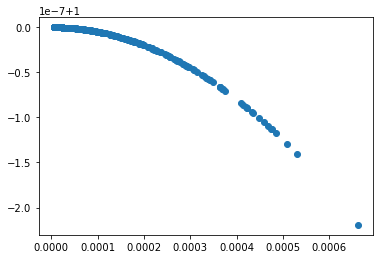

In [54]:
import matplotlib.pyplot as plt
y = scaled_df['INSTRUCTION_EXPENDITURE']
x = scaled_df['AVG_MATH_4_SCORE']
plt.scatter(x,y)

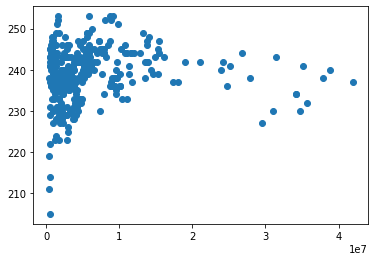

In [56]:
x = df['INSTRUCTION_EXPENDITURE']
y = df['AVG_MATH_4_SCORE']
plt.scatter(x,y)

In [258]:
df_filter3 = pd.DataFrame(data=df, columns = ['TOTAL_EXPENDITURE', 'TOTAL_REVENUE']).dropna()
df_filter3

,TOTAL_EXPENDITURE,TOTAL_REVENUE
561,5298932.0,5196054.0
562,1610289.0,1425948.0
563,6210287.0,6529894.0
564,3242799.0,3241275.0
565,59749885.0,59815855.0
...,...,...
1219,16113212.0,15857524.0
1220,13630138.0,13709442.0
1221,3466981.0,3478401.0
1222,11553677.0,11637376.0


In [259]:
d1 = preprocessing.normalize(df_filter3)
scaled_df1 = pd.DataFrame(d1, columns=['TOTAL_EXPENDITURE', 'TOTAL_REVENUE'])
scaled_df1.head()

,TOTAL_EXPENDITURE,TOTAL_REVENUE
0,0.714004,0.700142
1,0.748659,0.662955
2,0.689151,0.724618
3,0.707273,0.706941
4,0.706717,0.707497


Feature engineering justification: <BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID>

Two variables were selected for comparison, INSTRUCTION_EXPENDITURE and AVG_MATH_4_SCORE, and a normalization was tested to see if it would improve the ability to compare the numbers since the INSTUCTION_EXPENDITURE values are in the hundred-thousands and millions while the AVG_MATH_4_SCORE values are in the low hundreds.  After testing development of analysis charts with using normalized data and using un-normalized data, it was concluded that un-normalized data provided better charts for analysis.

Visualization


Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

Visualization 1

Text(0, 0.5, 'TOTAL_EXPENDITURE')

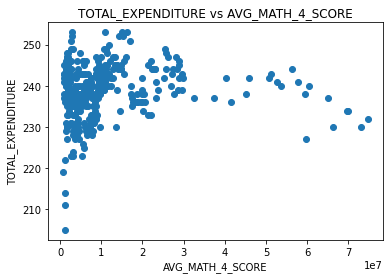

In [61]:
x = df['TOTAL_EXPENDITURE']
y = df['AVG_MATH_4_SCORE']

plt.scatter(x,y)
plt.title('TOTAL_EXPENDITURE vs AVG_MATH_4_SCORE')
plt.xlabel('AVG_MATH_4_SCORE')
plt.ylabel('TOTAL_EXPENDITURE')

Analysis was conducted to observe if any correlations could be identified between TOTAL_EXPENDITURE and AVG_MATH_4_SCORE amongst all the states.  The majority of the math score data seems to fall within the same range and did not show any trends towards increasing nor decreasing as the TOTAL EXPENDITURE levels differentiated.

Visualization 2

Text(0, 0.5, 'TOTAL_REVENUE')

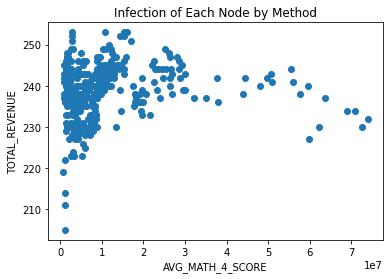

In [62]:
x = df['TOTAL_REVENUE']
y = df['AVG_MATH_4_SCORE']

plt.scatter(x,y)
plt.title('Infection of Each Node by Method')
plt.xlabel('AVG_MATH_4_SCORE')
plt.ylabel('TOTAL_REVENUE')

Analysis was conducted to observe if any correlations could be identified between TOTAL_REVENUE and AVG_MATH_4_SCORE amongst all the states. The majority of the math score data again seems to fall within the same range and did not show any trends towards increasing nor decreasing as the TOTAL EXPENDITURE levels differentiated.  Potential for change in this trend may be in the process of development with more data observed to be drifting away from the majority compared to the TOTAL_EXPENDITURE vs AVG_MATH_4_SCORE chart.  Further comparison with future data could help determine whether or not these assumptions of change are valid.

Data Creation

Use this space to create train/test data

In [63]:
from sklearn.model_selection import train_test_split

In [116]:
df_TE_TR = pd.DataFrame(data=df, columns=['TOTAL_EXPENDITURE', 'TOTAL_REVENUE'])

In [260]:
#X = df[['TOTAL_EXPENDITURE']]
#y = df['STATE']
#X1 = df[['TOTAL_REVENUE']]
#y1 = df['STATE']

#X = df[['TOTAL_EXPENDITURE']].dropna()
#y = df.loc[X.index]['STATE']

#X1 = df[['TOTAL_REVENUE']].dropna()
#y1 = df.loc[X.index]['STATE']

X = scaled_df1[['TOTAL_EXPENDITURE']]
y = scaled_df1[['TOTAL_REVENUE']]

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=350, random_state=42)
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=350, random_state=42)

Prediction


ML Models Resource

In [262]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [263]:
# create your model here
model = LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [268]:
y_pred1 = model.predict(X_test)

In [269]:
y_pred1

array([[0.71687222],
       [0.68022555],
       [0.69100889],
       [0.71447051],
       [0.68885145],
       [0.70417148],
       [0.69586816],
       [0.72770996],
       [0.70304274],
       [0.71504356],
       [0.70370531],
       [0.70705816],
       [0.70908402],
       [0.70430192],
       [0.70012996],
       [0.72050206],
       [0.73051264],
       [0.69501496],
       [0.67531359],
       [0.6850519 ],
       [0.71226593],
       [0.70942585],
       [0.71428843],
       [0.70415511],
       [0.69190086],
       [0.6931915 ],
       [0.70405856],
       [0.70403282],
       [0.69441272],
       [0.68303329],
       [0.7196901 ],
       [0.69603118],
       [0.71030322],
       [0.71319158],
       [0.70789641],
       [0.72422842],
       [0.68553493],
       [0.70301094],
       [0.68484308],
       [0.72876274],
       [0.69458914],
       [0.706557  ],
       [0.71122445],
       [0.70527334],
       [0.70313622],
       [0.70686633],
       [0.68545398],
       [0.686

In [270]:
#y_pred2

Evaluation


Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [272]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
# There are many caveats to R^2 but it is a good starting point
model.score(X_test, y_test)

0.9940024475455613

In [273]:
# mean error
np.mean(model.predict(X_test)-y_test)

TOTAL_REVENUE    0.000363
dtype: float64

In [274]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

TOTAL_REVENUE    0.000408
dtype: float64

In [275]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

TOTAL_REVENUE    0.001292
dtype: float64

In [221]:
#model2.score(X_test1, y_test1)

In [222]:
#from sklearn.dummy import DummyClassifier
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import accuracy_score

#def metrics_analysis():
#    dummy = DummyClassifier(strategy = 'stratified', random_state=0).fit(X_train, y_train)
#    y_dummy = dummy.predict(X_test)
    
#    dummy_majority = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_train, y_train)
#    y_dummy_majority = dummy_majority.predict(X_test)
    
#    preA = precision_score(y_test, y_dummy, average='binary')
#    recA = recall_score(y_test, y_dummy, average='binary')
#    accA = accuracy_score(y_test, y_dummy)
    
#    preB = precision_score(y_test, y_dummy_majority, average='binary')
#    recB = recall_score(y_test, y_dummy_majority, average='binary')
#    accB = accuracy_score(y_test, y_dummy_majority)
    
#    return preA, recA, accA, preB, recB, accB

#metrics_analysis()

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change col_name and modify the call to plt.ylabel() to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

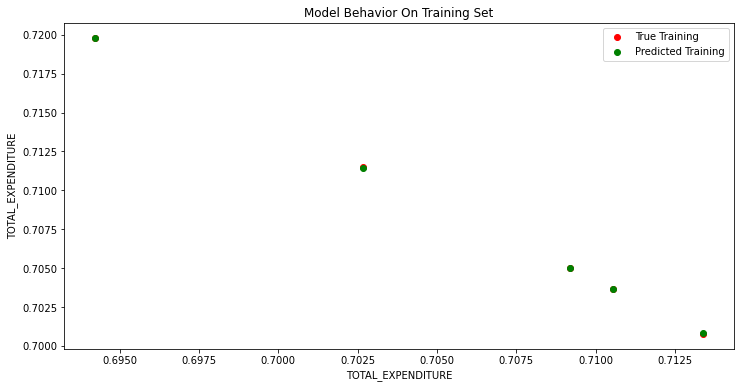

In [276]:
col_name = 'TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('TOTAL_EXPENDITURE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

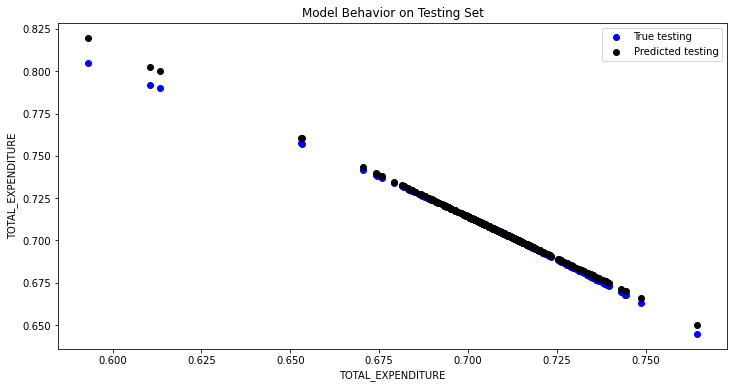

In [277]:
col_name = 'TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('TOTAL_EXPENDITURE')
plt.title("Model Behavior on Testing Set")

In [278]:
#col_name = 'TOTAL_REVENUE'

#f = plt.figure(figsize=(12,6))
#plt.scatter(y_train[col_name], y_train, color = "red")
#plt.scatter(y_train[col_name], model.predict(y_train), color = "green")

#plt.legend(['True Training','Predicted Training'])
#plt.xlabel(col_name)
#plt.ylabel('TOTAL_REVENUE')
#plt.title("Model Behavior On Training Set")

In [226]:
#col_name = 'TOTAL_REVENUE'

#f = plt.figure(figsize=(12,6))
#plt.scatter(y_test[col_name], y_test, color = "blue")
#plt.scatter(y_test[col_name], model.predict(y_test), color = "black")

#plt.legend(['True testing','Predicted testing'])
#plt.xlabel(col_name)
#plt.ylabel('TOTAL_REVENUE')
#plt.title("Model Behavior on Testing Set")

In [283]:
#r = np.corrcoef(X_train, y_train)
#r

import scipy.stats
spearman_corr_coeff = scipy.stats.spearmanr(X, y)
spearman_corr_coeff

SpearmanrResult(correlation=-1.0, pvalue=0.0)

Summary

The analysis conducted was to determine compare the feature variables TOTAL_EXPENDITURE and TOTAL_REVENUE and see how much correlation existed between the two feature variables.  A simple Linear Regression was started with to see if a linear-relationship could be observed between TOTAL_EXPENDITURE and TOTAL_REVENUE.  If a Linear Regression did not fit well, other machine learning models could also be tested.  The feature variable data was normalized to ensure differences in number sizes did not have any effect on the analysis.  Multiple predictions were created with an R^2 score of 99%.  Error rates measured were also found to be very low, and the scatter plots graphed displayed data that fit the linear prediction model very well.  The two line-graphs at the end demonstrate how sometimes data coming from the test-data can vary unpredictably compared to the training-data.  The goal during research is to select random samples to represent both the training and test data to prevent the affect of bias on research results.  Sometimes, even when data is selected randomly, trends in the results do not remain consistent between the training-data and the test-data.  Re-performing data experiments multiple times helps insure inaccuracies such as these are corrected, with addition of more data or increase in diversity of data-collected, so that data-research results can be trusted.  Pearson's Correlation Coefficient provided a level of -1, which represents 100% in the negative direction and may suggest some slight overfitting occurred during these tests and more tests are needed before moving forward.       